## Name: Jaime Pantoja
### LSTM Model for Classification Task

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import plot_model


# Download the data
data = yf.download('^GSPC', start='2014-10-01', end='2024-10-01')

# Select only the required features
data = data[['Close', 'High', 'Low', 'Open']]

# Note: Lagged Features are not necesary when dealing with LSTM models

# Create the target variable (1 if positive, 0 if negative)
data['Target'] = np.where(data['Close'] < data['Close'].shift(1), 1, 0)

# Drop rows with missing values
data.dropna(inplace=True)

# Features and Labels. Filter the data with the features needed for training the model
X = data[['Close','Open']]
y = data['Target']

# Train-test split (before scaling to prevent data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to create sequences
def create_sequences(X, y, timesteps=5):
    X_seq, y_seq = [], []
    for i in range(len(X) - timesteps):
        X_seq.append(X[i:i + timesteps])
        y_seq.append(y[i + timesteps])
    return np.array(X_seq), np.array(y_seq)

# Number of previous observations to consider (Timesteps)
timesteps = 60
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, timesteps)


[*********************100%%**********************]  1 of 1 completed
C:\Users\jaime\AppData\Local\Temp\ipykernel_292\3688237340.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Target'] = np.where(data['Close'] < data['Close'].shift(1), 1, 0)
C:\Users\jaime\AppData\Local\Temp\ipykernel_292\3688237340.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


Epoch 1/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5204 - loss: 0.6908 - val_accuracy: 0.5315 - val_loss: 0.6913
Epoch 2/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5291 - loss: 0.6919 - val_accuracy: 0.5315 - val_loss: 0.6925
Epoch 3/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5411 - loss: 0.6902 - val_accuracy: 0.5315 - val_loss: 0.6921
Epoch 4/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5815 - loss: 0.6807 - val_accuracy: 0.5315 - val_loss: 0.6914
Epoch 5/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5626 - loss: 0.6865 - val_accuracy: 0.5315 - val_loss: 0.6913
Epoch 6/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5442 - loss: 0.6896 - val_accuracy: 0.5315 - val_loss: 0.6913
Epoch 7/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5346 - loss: 0.6906 - val_accuracy: 0.5315 - val_loss: 0.6913
Epoch 8/100
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5383 - loss: 0.6898 - val_accuracy: 0.

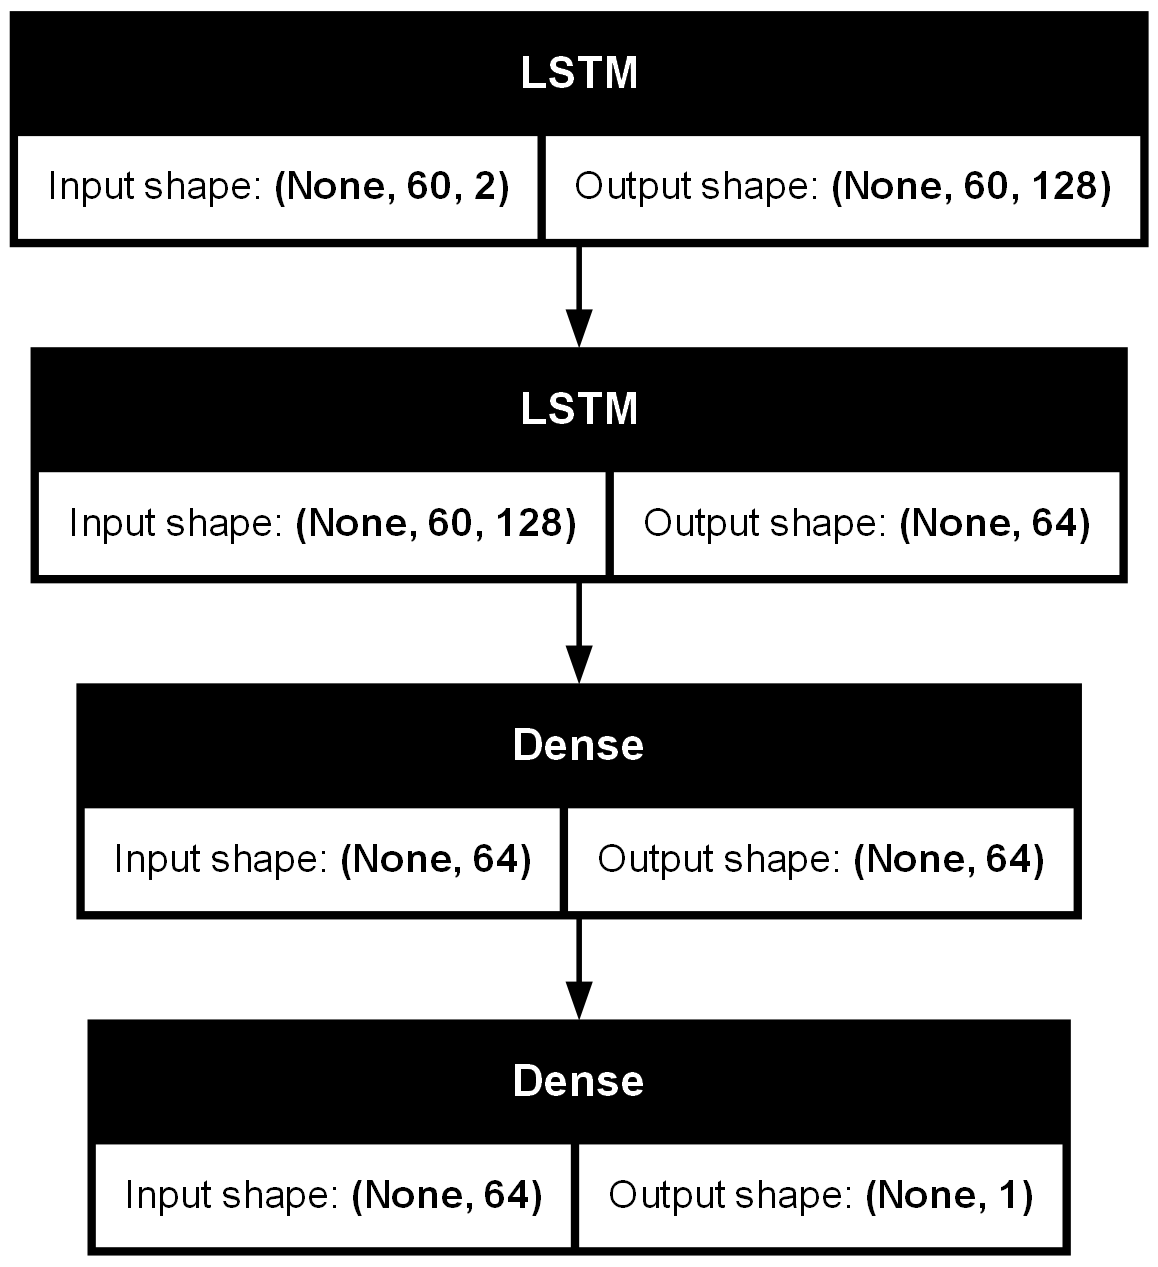

In [3]:
# Define the LSTM Model
model_LSTM = Sequential()
model_LSTM.add(LSTM(units=128, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model_LSTM.add(LSTM(units=64, return_sequences=False))
model_LSTM.add(Dense(64, activation='relu'))
# Output layer with 1 unit and sigmoid activation (for binary classification)
model_LSTM.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_LSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_LSTM.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, 
validation_data=(X_test_seq, y_test_seq))

# Evaluate the model
loss, accuracy = model_LSTM.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Once the model is defined, then it is possible to plot its structure
plot_model(model_LSTM, to_file='model_lstm.png', show_shapes=True)

